In [1]:
%pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 4.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.8 MB 4.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.8 MB 4.2 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.3/1.8 MB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Install basic Python libraries
%pip install numpy pandas matplotlib seaborn tqdm opencv-python-headless --user


Note: you may need to restart the kernel to use updated packages.


In [6]:


# Install TensorFlow
%pip install tensorflow




Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install imutils


In [10]:
!pip install scikit-learn

In [1]:
# Importing Libraries
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn


import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils



from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, InputLayer, MaxPooling2D, Flatten, BatchNormalization, Dropout
from datetime import datetime

# Import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import KFold



In [17]:
# Creating Directory for cropped dataset
os.mkdir("C:/Users/qwp/Documents/DR Prediction/Cropped-Dataset/")
os.mkdir("C:/Users/qwp/Documents/DR Prediction/Cropped-Dataset/Cropped-DME")
os.mkdir("C:/Users/qwp/Documents/DR Prediction/Cropped-Dataset/Cropped-Normal")

Class: DME, Number of images: 5
Class: Normal, Number of images: 5


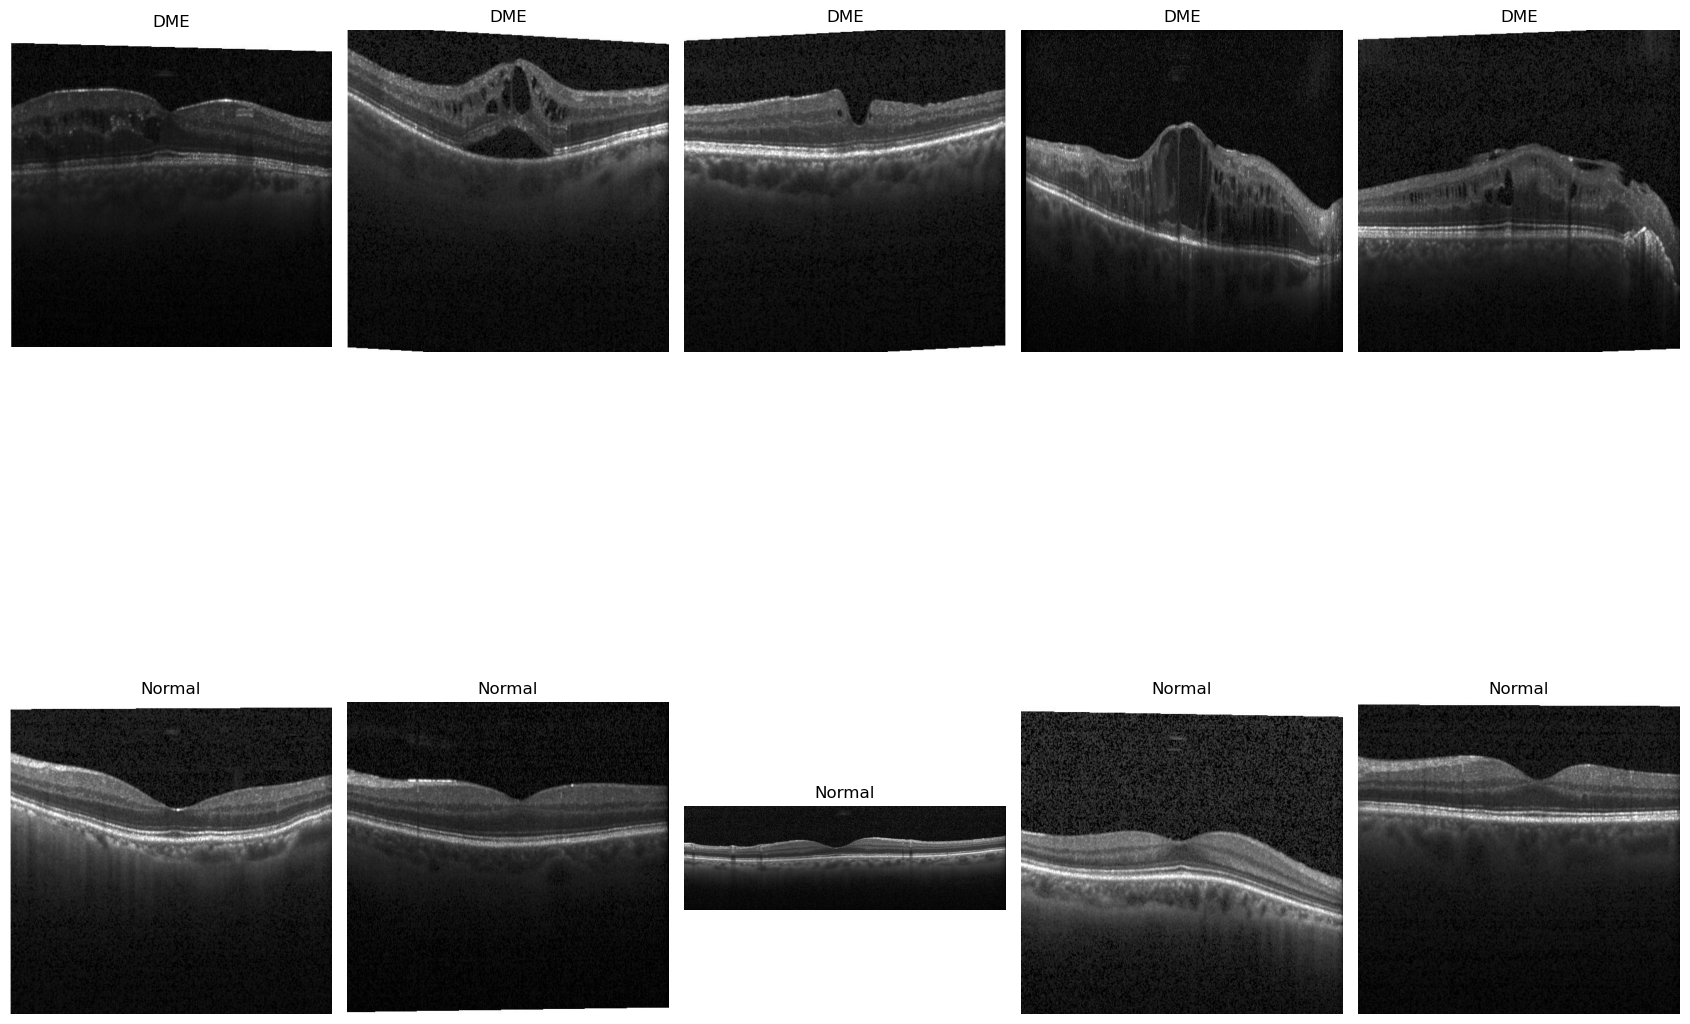

In [3]:
#Importing Dataset

dataset_dir = "C:/Users/qwp/Documents/DR Prediction/Dataset/"
classes = os.listdir(dataset_dir)
files_path_dict = {}

for c in classes:
    class_dir = os.path.join(dataset_dir, c)
    files_path_dict[c] = [os.path.join(class_dir, x) for x in os.listdir(class_dir)]

plt.figure(figsize=(17, 17))
index = 0
num_images_per_class = 5  # Number of images to display per class

for c in classes:
    random.shuffle(files_path_dict[c])
    path_list = files_path_dict[c][:num_images_per_class]  # Take only the first `num_images_per_class` images
    print(f"Class: {c}, Number of images: {len(path_list)}")  # Debug output

    for i in range(num_images_per_class):  # Ensure index is within bounds
        index += 1
        plt.subplot(len(classes), num_images_per_class, index)  # Adjust grid size based on number of classes and images per class
        img = load_img(path_list[i])
        plt.imshow(img)
        plt.title(c)
        plt.axis('off')  # Hide axis for a cleaner look

plt.tight_layout()
plt.show()

In [31]:
#Create a function to crop image

def crop_image(image, plot=False):

    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)

    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image

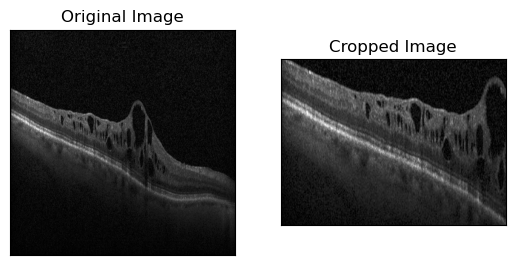

In [39]:
example_img = cv2.imread("C:/Users/qwp/Documents/DR Prediction/Dataset/DME/DME-30521-37.jpeg")
copped_image = crop_image(example_img, plot=True)

In [33]:
# Saving the cropped images

dme = dataset_dir+'DME/'
normal = dataset_dir+'Normal/'

j = 0
for i in tqdm(os.listdir(dme)):
  path = os.path.join(dme,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:/Users/qwp/Documents/DR Prediction/Cropped-Dataset/Cropped-DME/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j + 1

j = 0
for i in tqdm(os.listdir(normal)):
  path = os.path.join(normal,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:/Users/qwp/Documents/DR Prediction/Cropped-Dataset/Cropped-Normal/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j + 1



100%|██████████████████████████████████████████████████████████████████████████████| 4500/4500 [00:56<00:00, 80.16it/s]


In [7]:
# Step 1: Initial train/validation split

cropped_dataset_dir = 'C:/Users/qwp/Documents/DR Prediction/Cropped-Dataset/'
image_size = (256, 256)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    cropped_dataset_dir,
    validation_split=0.1,  # Keep 10% for validation
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
)

initial_validation_ds = tf.keras.utils.image_dataset_from_directory(
    cropped_dataset_dir,
    validation_split=0.1,  # 10% kept for validation
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    color_mode='grayscale',
)

validation_ds = initial_validation_ds.shard(num_shards=2, index=0)
test_ds = initial_validation_ds.shard(num_shards=2, index=1)

# Step 3: Optionally batch the datasets
# validation_dataset = validation_dataset.batch(batch_size)
# test_dataset = test_dataset.batch(batch_size)

# Step 4: (Optional) Shuffle the datasets for better performance in model evaluation
validation_ds = validation_ds.shuffle(buffer_size=1000)
test_ds = test_ds.shuffle(buffer_size=1000)

Found 8840 files belonging to 2 classes.
Using 7956 files for training.
Found 8840 files belonging to 2 classes.
Using 884 files for validation.


In [9]:
print("Train spec:", train_ds.cardinality().numpy())
print("Val spec:", validation_ds.cardinality().numpy())
print("Test spec:", test_ds.cardinality().numpy())

Train spec: 249
Val spec: 14
Test spec: 14


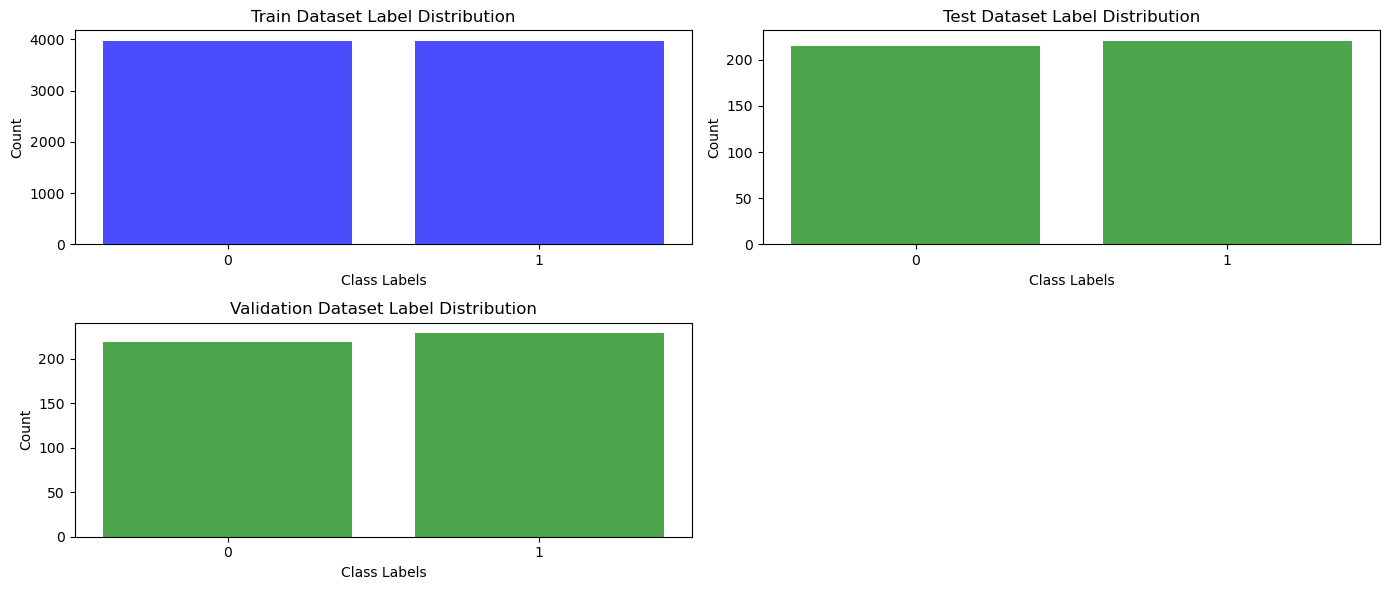

In [19]:
#Label Distribution

def extract_labels(dataset):
    labels = []
    for _, batch_labels in dataset:
        labels.extend(batch_labels.numpy())
    return np.array(labels)

# Extract labels from the datasets
train_labels = extract_labels(train_ds)
test_labels = extract_labels(test_ds)
validation_labels = extract_labels(validation_ds)
# Count occurrences of each label
train_label_counts = np.bincount(train_labels)
test_label_counts = np.bincount(test_labels)
validation_label_counts = np.bincount(validation_labels)
# Assuming you have a fixed number of classes, you can use the length of the count array
num_classes = len(train_label_counts)

# Create a bar chart for train dataset
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
plt.bar(range(num_classes), train_label_counts, tick_label=range(num_classes), color='blue', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Train Dataset Label Distribution')

# Create a bar chart for test dataset
plt.subplot(2, 2, 2)
plt.bar(range(num_classes), test_label_counts, tick_label=range(num_classes), color='green', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Test Dataset Label Distribution')

plt.subplot(2, 2, 3)
plt.bar(range(num_classes), validation_label_counts, tick_label=range(num_classes), color='green', alpha=0.7)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Validation Dataset Label Distribution')

plt.tight_layout()
plt.show()


In [11]:
image_batch, label_batch = next(train_ds.as_numpy_iterator())

# Access a single image (first image in the batch)
single_image = image_batch[0]
single_label = label_batch[3]

print(f"Image shape: {single_image.shape}")
print(f"Label: {single_label}")

Image shape: (256, 256, 1)
Label: 1


In [13]:
#Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)
test_ds = test_ds.map(process)

In [15]:


# for k fold cross validation

# Updated model
from keras.regularizers import l2

def create_model():
    model = Sequential()
    model.add(InputLayer(shape=(256, 256, 1)))

    # First Conv Block
    model.add(Conv2D(32, kernel_size=(5, 5), padding='valid'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

    # Second Conv Block
    model.add(Conv2D(64, kernel_size=(5, 5), padding='valid'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

    # Third Conv Block
    model.add(Conv2D(128, kernel_size=(5, 5), padding='valid'))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

    model.add(Flatten())

    # Fully connected layers with L2 regularization
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # Add L2 regularization here
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))  # Add L2 regularization here
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    return model


In [17]:

# Initialize the model by calling the create_model function
model = create_model()

# Now you can call model.summary()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 252, 252, 32)        │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 252, 252, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 252, 252, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 122, 122, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 57, 57, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 57, 57, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 57, 57, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │              

 Total params: 13,112,193 (50.02 MB)

 Trainable params: 13,111,361 (50.02 MB)

 Non-trainable params: 832 (3.25 KB)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics= ['accuracy'])
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [21]:
history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=[
#     EarlyStopping(monitor='val_loss', patience=5),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)
])

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 858s 3s/step - accuracy: 0.8000 - loss: 1.0194 - val_accuracy: 0.4888 - val_loss: 3.6037 - learning_rate: 0.0010
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 901s 4s/step - accuracy: 0.9161 - loss: 0.5281 - val_accuracy: 0.6339 - val_loss: 1.1659 - learning_rate: 0.0010
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1789s 7s/step - accuracy: 0.9201 - loss: 0.4298 - val_accuracy: 0.8772 - val_loss: 0.4875 - learning_rate: 0.0010
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 854s 3s/step - accuracy: 0.9253 - loss: 0.4171 - val_accuracy: 0.9040 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 861s 3s/step - accuracy: 0.9286 - loss: 0.4332 - val_accuracy: 0.9509 - val_loss: 0.3760 - learning_rate: 0.0010
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 861s 3s/step - accuracy: 0.9412 - loss: 0.3786 - val_accuracy: 0.8638 - val_loss: 0.5585 - learning_rate: 0.0010
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 873s 4s/step - accuracy: 0.9425 - loss: 0

In [ ]:
# k = 10
# kf = KFold(n_splits=k, shuffle=True, random_state=42)
# test_accuracies = []

# for train_index, test_index in kf.split(list(test_ds)):
#     # Create and compile model
#     model = create_model()
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     # Train model on training data
#     history = model.fit(train_ds, epochs=20, validation_data=validation_ds, callbacks=[
#     ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)
# ])

#     # Evaluate on test set
#     test_accuracy = model.evaluate(test_ds, verbose=0)[1]
#     test_accuracies.append(test_accuracy)

# average_test_accuracy = np.mean(test_accuracies)
# print(f"Average test accuracy over {k} folds: {average_test_accuracy:.4f}")

Epoch 1/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 961s 4s/step - accuracy: 0.7919 - loss: 1.0889 - val_accuracy: 0.4710 - val_loss: 5.7739 - learning_rate: 0.0010
Epoch 2/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1160s 5s/step - accuracy: 0.9069 - loss: 0.6179 - val_accuracy: 0.7656 - val_loss: 0.7688 - learning_rate: 0.0010
Epoch 3/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1142s 5s/step - accuracy: 0.9294 - loss: 0.4529 - val_accuracy: 0.8326 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 4/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 972s 4s/step - accuracy: 0.9209 - loss: 0.4435 - val_accuracy: 0.8705 - val_loss: 0.5810 - learning_rate: 0.0010
Epoch 5/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1174s 5s/step - accuracy: 0.9356 - loss: 0.4051 - val_accuracy: 0.9375 - val_loss: 0.3714 - learning_rate: 0.0010
Epoch 6/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1256s 5s/step - accuracy: 0.9310 - loss: 0.4175 - val_accuracy: 0.9107 - val_loss: 0.4819 - learning_rate: 0.0010
Epoch 7/20
249/249 ━━━━━━━━━━━━━━━━━━━━ 1157s 5s/step - accuracy: 0.9092 - los

C:\Users\qwp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\qwp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\qwp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\qwp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

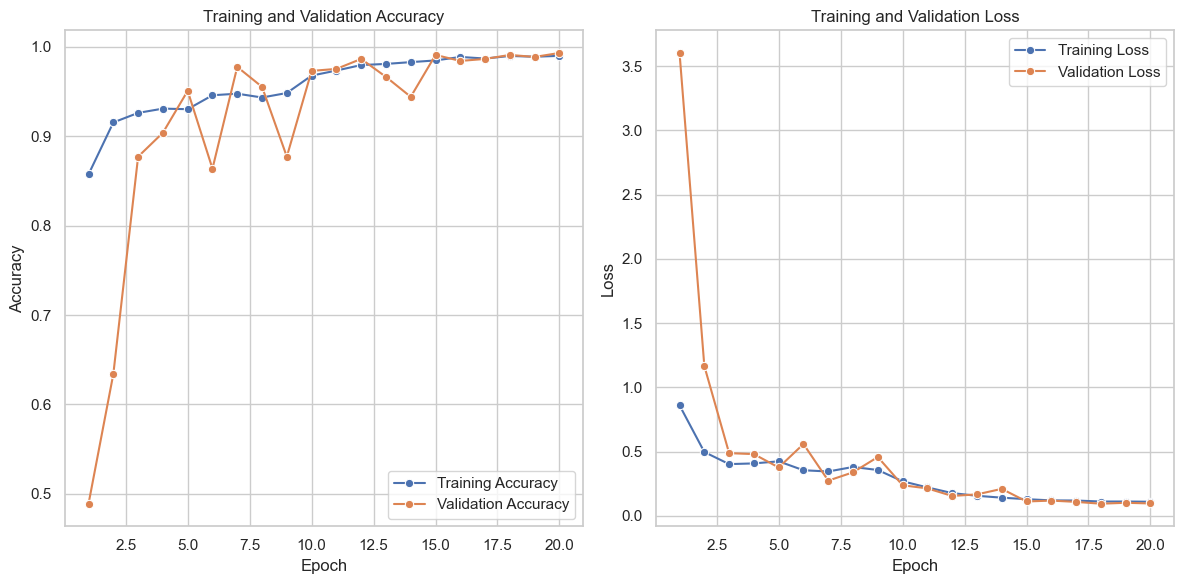

In [23]:
# Assuming 'history' is the History object returned from model.fit()
history_dict = history.history

# Convert the history to a DataFrame
df = pd.DataFrame(history_dict)

# Add an 'epoch' column for easier plotting
df['epoch'] = df.index + 1

# Set the plot style
sns.set(style="whitegrid")

# Plot accuracy
plt.figure(figsize=(12, 6))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
sns.lineplot(x='epoch', y='accuracy', data=df, label='Training Accuracy', marker='o')
sns.lineplot(x='epoch', y='val_accuracy', data=df, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Save the plot with the timestamp in the filename
filename = f"acc_plot_{current_time}.png"
plt.savefig(filename)

# Subplot 2: Loss
plt.subplot(1, 2, 2)
sns.lineplot(x='epoch', y='loss', data=df, label='Training Loss', marker='o')
sns.lineplot(x='epoch', y='val_loss', data=df, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
filename = f"loss_plot_{current_time}.png"
plt.savefig(filename)

# Display the plots
plt.tight_layout()
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 583ms/step - accuracy: 0.9891 - loss: 0.1065
Test Loss: 0.10820368677377701
Test Accuracy: 0.988452672958374
Manual Accuracy: 0.9907621145248413

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       225
           1       1.00      0.99      0.99       208

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



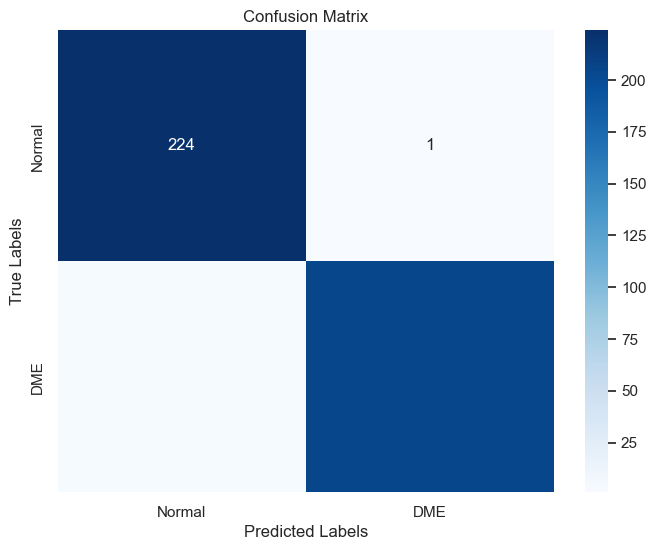

In [59]:

    
# # evaluate_2(test_ds)
# def evaluate_2(dataset):
#     import tensorflow as tf
#     import numpy as np
#     from sklearn.metrics import classification_report, confusion_matrix
#     import seaborn as sns
#     import matplotlib.pyplot as plt

#     test_loss, test_acc = model.evaluate(dataset)
#     print(f"Test Loss: {test_loss}")
#     print(f"Test Accuracy: {test_acc}")

#     # Initialize accuracy metric
#     accuracy_metric = tf.keras.metrics.BinaryAccuracy()

#     # List to store true labels and predictions
#     y_true = []
#     y_pred_classes = []

#     # Iterate over the dataset
#     for images, labels in dataset:
#         # Get predictions from the model
#         predictions = model(images, training=False)

#         # Update the accuracy metric
#         accuracy_metric.update_state(labels, predictions)

#         # Convert probabilities to binary class labels
#         predicted_classes = tf.where(predictions > 0.5, 1, 0).numpy().flatten()

#         # Append true labels and predicted labels
#         y_true.extend(labels.numpy().flatten())
#         y_pred_classes.extend(predicted_classes)

#     # Convert lists to numpy arrays
#     y_true = np.array(y_true)
#     y_pred_classes = np.array(y_pred_classes)

#     # Calculate final accuracy using TensorFlow's built-in metric
#     final_accuracy = accuracy_metric.result().numpy()
#     print(f"Manual Accuracy: {final_accuracy}")

#     # Generate classification report
#     print("\nClassification Report:")
#     print(classification_report(y_true, y_pred_classes))

#     # Generate confusion matrix
#     conf_matrix = confusion_matrix(y_true, y_pred_classes)

#     # Plot confusion matrix using seaborn with custom labels
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#                 xticklabels=['Normal', 'DME'],
#                 yticklabels=['Normal', 'DME'])
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title('Confusion Matrix')
#     plt.show()

# evaluate_2(test_ds)


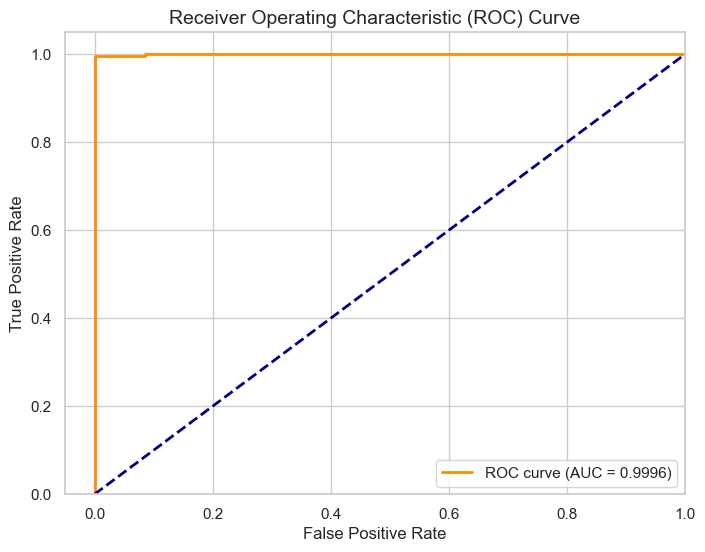

In [25]:


# Define the function to plot the ROC curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, dataset):
    # Lists to store true labels and predicted probabilities
    y_true = []
    y_pred_probs = []

    # Iterate over the dataset to get predictions and true labels
    for images, labels in dataset:
        # Get predicted probabilities from the model
        predictions = model(images, training=False)
        # Append true labels and predicted probabilities
        y_true.extend(labels.numpy().flatten())
        y_pred_probs.extend(predictions.numpy().flatten())

    # Convert lists to numpy arrays for compatibility with sklearn functions
    y_true = np.array(y_true)
    y_pred_probs = np.array(y_pred_probs)

    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    # Compute Area Under the Curve (AUC) score
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    lw = 2  # Line width
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.4f)' % roc_auc)
    # Plot the diagonal line for reference (no skill classifier)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Call the function with your trained model and test dataset
plot_roc_curve(model, test_ds)


14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 559ms/step - accuracy: 0.9931 - loss: 0.0930
Test Loss: 0.0880020335316658
Test Accuracy: 0.997706413269043
Manual Accuracy: 0.9931192398071289

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       222
           1       0.99      1.00      0.99       214

    accuracy                           0.99       436
   macro avg       0.99      0.99      0.99       436
weighted avg       0.99      0.99      0.99       436

Manual F1 Score: 0.9930
Sensitivity (Recall): 1.0000
Specificity: 0.9865


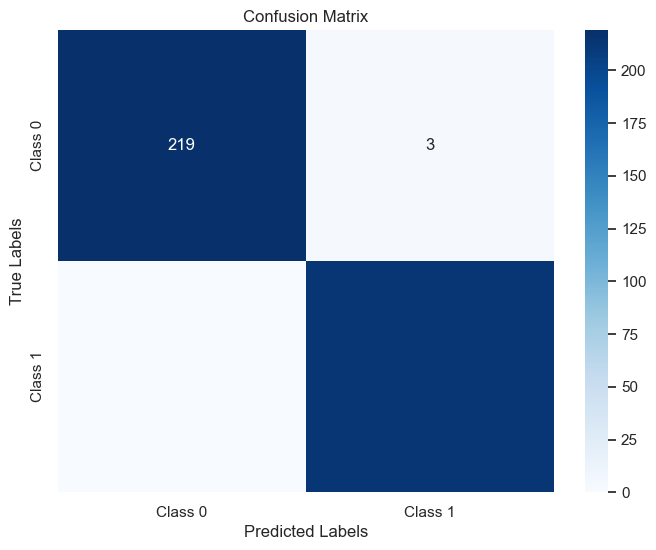

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score

def evaluate_sensitivity(dataset):
    from sklearn.metrics import confusion_matrix
    
    
    # Evaluate the model on the test dataset
    test_loss, test_acc = model.evaluate(dataset)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_acc}")
    
    # Initialize accuracy metric
    accuracy_metric = tf.keras.metrics.BinaryAccuracy()

    # List to store true labels and predictions
    y_true = []
    y_pred_classes = []

    # Iterate over the dataset
    for images, labels in dataset:
        # Get predictions from the model
        predictions = model(images, training=False)
        # Update the accuracy metric
        accuracy_metric.update_state(labels, predictions)

        # Convert probabilities to binary class labels
        predicted_classes = tf.where(predictions > 0.5, 1, 0).numpy().flatten()

        # Append true labels and predicted labels
        y_true.extend(labels.numpy().flatten())
        y_pred_classes.extend(predicted_classes)

    # Convert lists to numpy arrays
    y_true = np.array(y_true)
    y_pred_classes = np.array(y_pred_classes)

    # Calculate final accuracy using TensorFlow's built-in metric
    final_accuracy = accuracy_metric.result().numpy()
    print(f"Manual Accuracy: {final_accuracy}")

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred_classes))

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    # Extract TP, FP, FN, TN from confusion matrix
    TN, FP, FN, TP = conf_matrix.ravel()

    # Calculate precision and recall
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    
    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"Manual F1 Score: {f1:.4f}")
    
    
    # Calculate sensitivity
    sensitivity = TP / (TP + FN)
    print(f"Sensitivity (Recall): {sensitivity:.4f}")

    # Calculate specificity
    specificity = TN / (TN + FP)
    print(f"Specificity: {specificity:.4f}")
    
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], 
                yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function with your test dataset
evaluate_sensitivity(test_ds)


In [65]:
# Save the model

import datetime
current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
model.save(f'cnn_{current_time}.keras')

In [66]:
#Model Explanation
for i in range(len(model.layers)):
    layer = model.layers[i]
#     if 'conv' not in layer.name:
#         continue    
    print(i , layer.name , layer.output.shape)

0 conv2d (None, 252, 252, 32)
1 batch_normalization (None, 252, 252, 32)
2 activation (None, 252, 252, 32)
3 max_pooling2d (None, 126, 126, 32)
4 conv2d_1 (None, 122, 122, 64)
5 batch_normalization_1 (None, 122, 122, 64)
6 activation_1 (None, 122, 122, 64)
7 max_pooling2d_1 (None, 61, 61, 64)
8 conv2d_2 (None, 57, 57, 128)
9 batch_normalization_2 (None, 57, 57, 128)
10 activation_2 (None, 57, 57, 128)
11 max_pooling2d_2 (None, 28, 28, 128)
12 flatten (None, 100352)
13 dense (None, 128)
14 batch_normalization_3 (None, 128)
15 dropout (None, 128)
16 dense_1 (None, 64)
17 batch_normalization_4 (None, 64)
18 dropout_1 (None, 64)
19 dense_2 (None, 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
Validation Set Feature Maps:


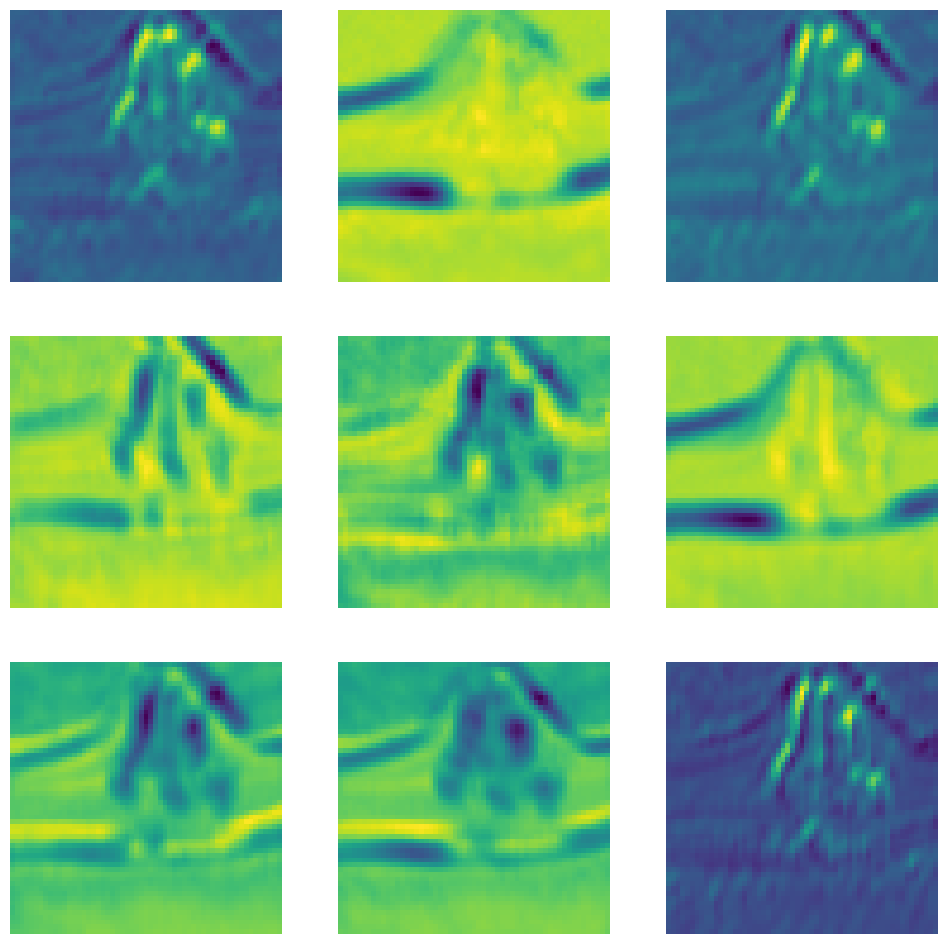

Test Set Feature Maps:


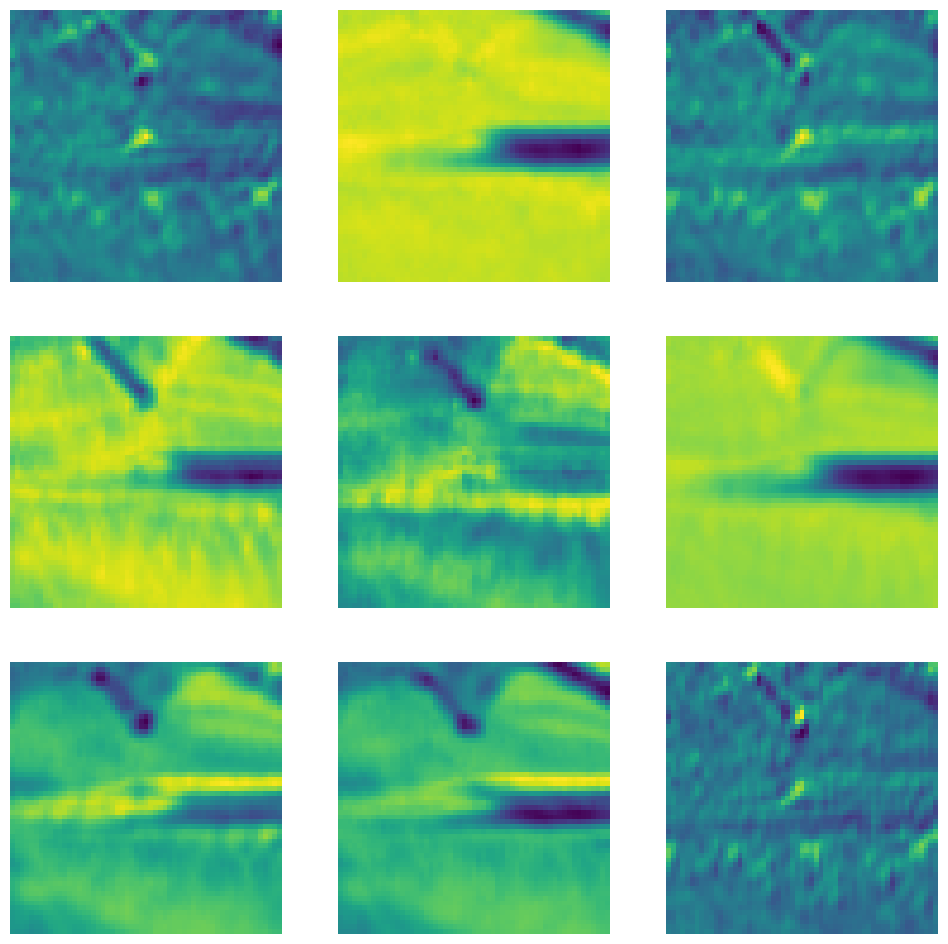

train Set Feature Maps:


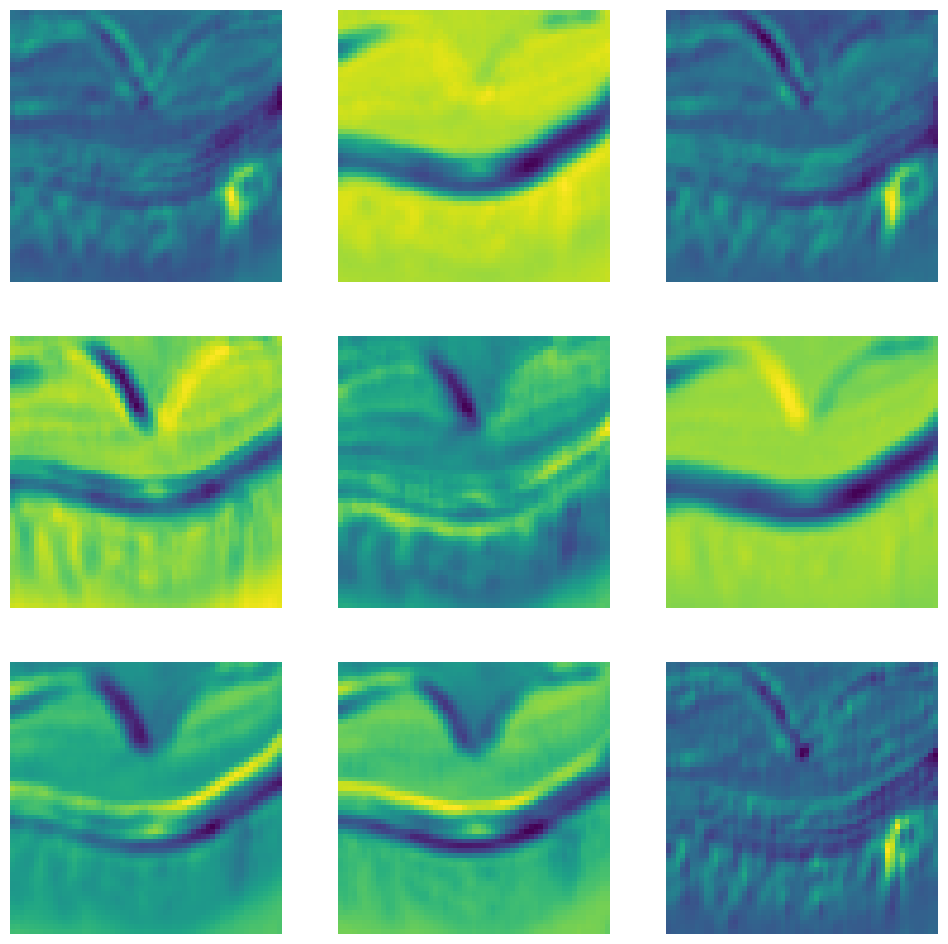

In [69]:
#Showing Feature map

# Step 1: Choose a layer from which to visualize the feature map
layer_name = 'conv2d_2'  # Replace with your desired convolutional layer name
layer_output = model.get_layer(layer_name).output

# Step 2: Create a model that outputs the selected layer's activations
activation_model = tf.keras.models.Model(inputs=model.inputs, outputs=layer_output)

# Step 3: Function to plot feature maps
def plot_feature_maps(feature_maps, image_index=0, num_feature_maps=9):
    # Get feature maps for the specific image
    feature_maps = feature_maps[image_index]  # Choose the first image in the batch
    square = int(np.ceil(np.sqrt(num_feature_maps)))  # Plot in square grid

    fig, axes = plt.subplots(square, square, figsize=(12, 12))
    axes = axes.flatten()

    for i in range(num_feature_maps):
        if i < feature_maps.shape[-1]:
            axes[i].imshow(feature_maps[..., i], cmap='viridis')
            axes[i].axis('off')
        else:
            axes[i].remove()  # Remove excess subplots if less than square^2 maps

    plt.show()

# Step 4: Get feature maps for validation or test data
# Get a batch of validation images
for images, labels in validation_ds.take(1):
    validation_images = images
    break

# Get a batch of test images
for images, labels in train_ds.take(1):
    train_images = images
    break
    
# Get a batch of test images
for images, labels in test_ds.take(1):
    test_images = images
    break

# Step 5: Get the feature maps from the selected layer
# For validation data
val_feature_maps = activation_model.predict(validation_images)

# For test data
test_feature_maps = activation_model.predict(test_images)

# For train data
train_feature_maps = activation_model.predict(train_images)

# Step 6: Visualize feature maps
# Plot the feature maps for validation set
print("Validation Set Feature Maps:")
plot_feature_maps(val_feature_maps, image_index=0, num_feature_maps=9)

# Plot the feature maps for test set
print("Test Set Feature Maps:")
plot_feature_maps(test_feature_maps, image_index=0, num_feature_maps=9)

# Plot the feature maps for test set
print("train Set Feature Maps:")
plot_feature_maps(train_feature_maps, image_index=0, num_feature_maps=9)
